# Shor's Algorithm 

## Factoring numbers on a quantum computer

Shor's algorithm is a quantum algorithm for factoring a number 𝑁  in polynomial time. We will write a quantum program to factor the number 15. We will implement the code on Qiskit. The following circuit will be implemented

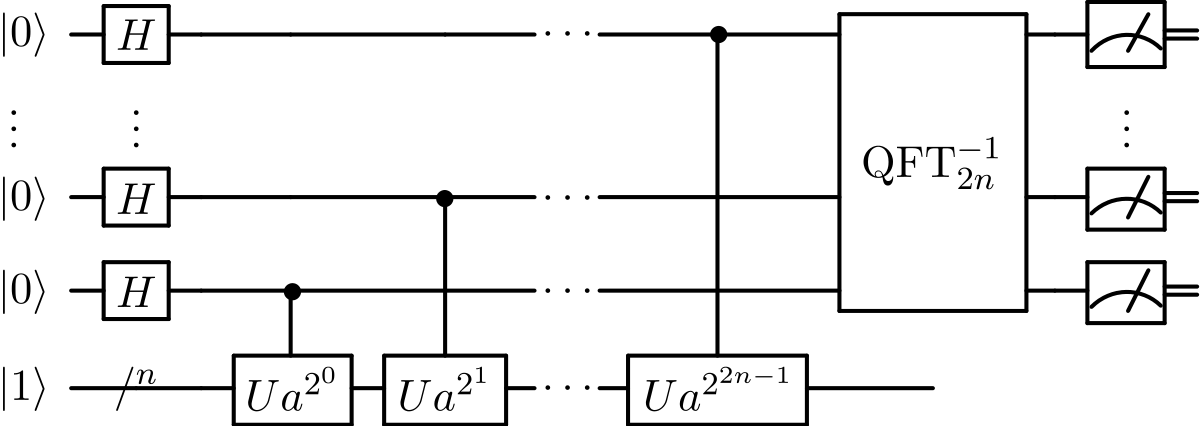

We will first import the required libraries from qiskit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from math import gcd
import pandas as pd
from qiskit.visualization import plot_histogram

### Step 1: Initializing the qubits

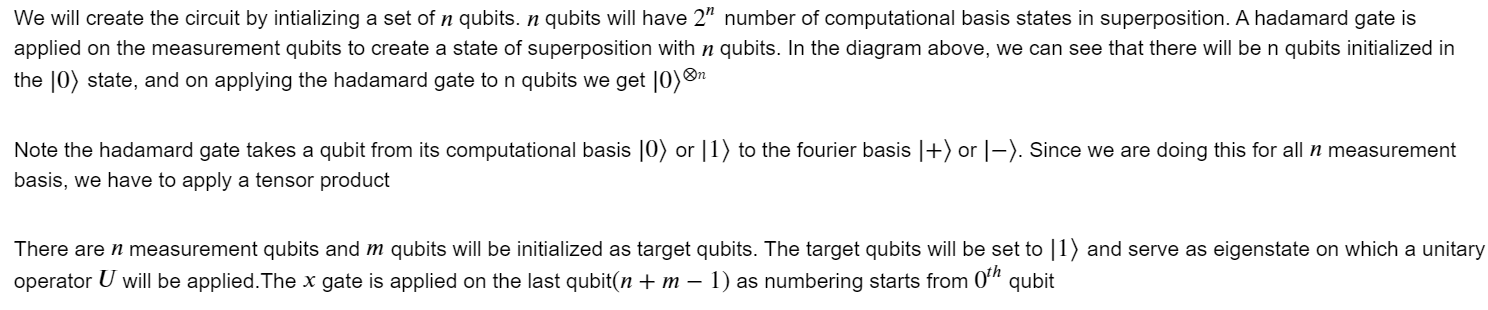

In [2]:
def initialize_qubits(given_circuit, n, m):

    given_circuit.h(range(n))
    given_circuit.x(n+m-1)

### Step 2: Modular exponentiation 

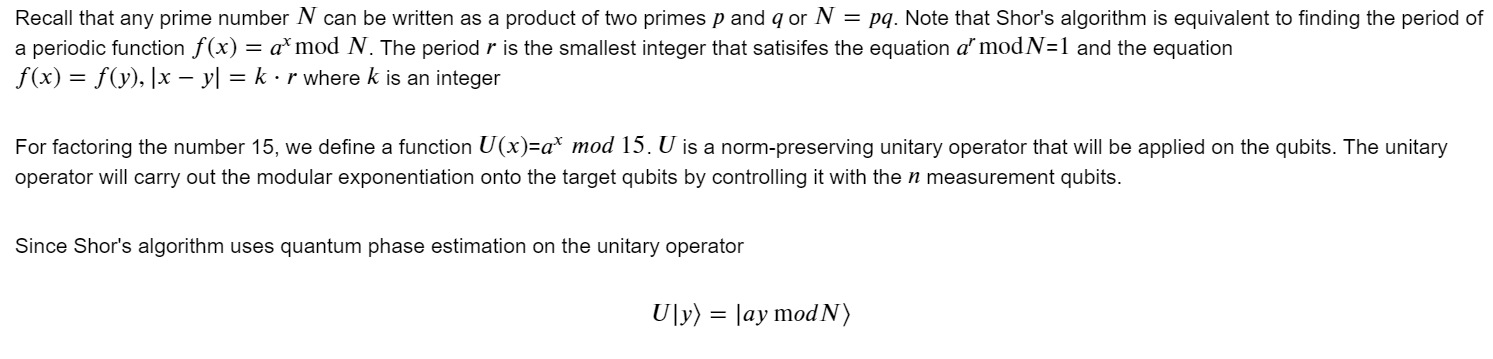

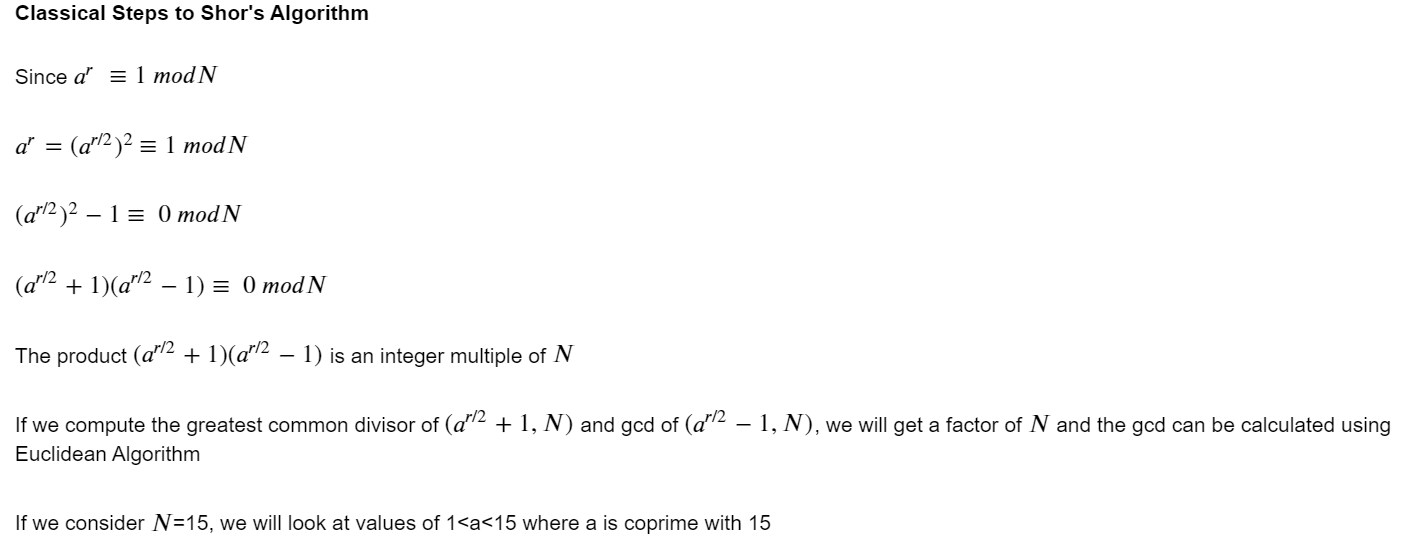

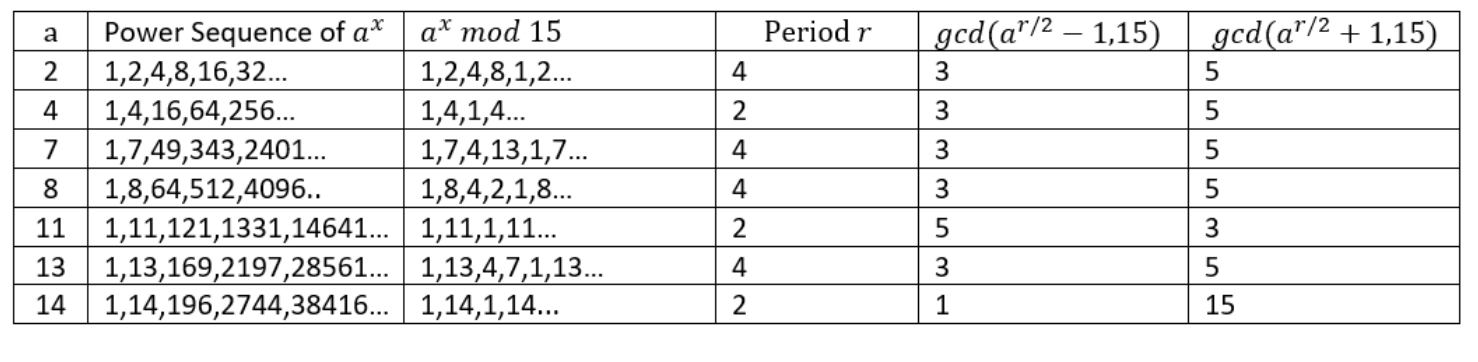

Any value of 𝑎 except 14 returns the factors of 15. When we test shor's algorithm, we will use a=7

We will define the function c_amod15 which returns controlled-U gate for 𝑎 repeated 𝑥 times. c_amod15 will be a 4 qubit unitary controlled by a 5th qubit which will be appended to the circuit

In [3]:
from qiskit import QuantumCircuit

def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

Next we will carry out modular exponentiation on the circuit and append the fifth qubit by passing the control qubit followed by 4 target qubits

In [4]:
def modular_exponentiation(circuit, n, m, a):
    

    for x in range(n):
        exponent = 2**x
        circuit.append(c_amod15(a, exponent), 
                     [x] + list(range(n, n+m)))

### Step 3: Applying the Inverse Quantum Fourier Transform

First we will import the QFT class from the qiskit. circuit library

In [5]:
from qiskit.circuit.library import QFT

Next we will define a function inverse_qft will take two parameters: the circuit on which the inverse Quantum Fourier transform will be applied and the set of measurement qubits onto which the Inverse Fourier transform will be applied and apply the .inverse() function to get the inverse QFT function.

In [6]:
def inverse_qft(circuit, measurement_qubits):
    

    circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(), measurement_qubits)

Now we will call the functions we have created to see the output

### Step 4: Implementing the circuit

In [10]:
def shors_algorithm(n, m, a):
    
   
    qc = QuantumCircuit(n+m, n)
    
  
    initialize_qubits(qc, n, m)
    qc.barrier()

   
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

 
    inverse_qft(qc, range(n))

    
    qc.measure(range(n), range(n))
    
    return qc
    
n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)
final_circuit.draw()

┌───┐ ░                                                              ░ »
q_0: ┤ H ├─░────────■─────────────────────────────────────────────────────░─»
     ├───┤ ░        │                                                     ░ »
q_1: ┤ H ├─░────────┼──────────────■──────────────────────────────────────░─»
     ├───┤ ░        │              │                                      ░ »
q_2: ┤ H ├─░────────┼──────────────┼──────────────■───────────────────────░─»
     ├───┤ ░        │              │              │                       ░ »
q_3: ┤ H ├─░────────┼──────────────┼──────────────┼──────────────■────────░─»
     └───┘ ░ ┌─────┴┼──────┐┌─────┴┼──────┐┌─────┴┼──────┐┌─────┴┼──────┐ ░ »
q_4: ──────░─┤0     │      ├┤0     │      ├┤0     │      ├┤0     │      ├─░─»
           ░ │             ││             ││             ││             │ ░ »
q_5: ──────░─┤1            ├┤1            ├┤1            ├┤1            ├─░─»
           ░ │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │ ░ »
q_6: ──────░─┤2            ├┤2            ├┤2            ├┤2            ├─░─»
     ┌───┐ ░ │             ││             ││             ││             │ ░ »
q_7: ┤ X ├─░─┤3            ├┤3            ├┤3            ├┤3            ├─░─»
     └───┘ ░ └─────────────┘└─────────────┘└─────────────┘└─────────────┘ ░ »
c_0: ═══════════════════════════════════════════════════════════════════════»
                                                                            »
c_1: ═══════════════════════════════════════════════════════════════════════»
                                                                            »
c_2: ═══════════════════════════════════════════════════════════════════════»
                                                                            »
c_3: ═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───────┐┌─┐         
«q_0: ┤0      ├┤M├─────────
«     │       │└╥┘┌─┐      
«q_1: ┤1      ├─╫─┤M├──────
«     │  iqft │ ║ └╥┘┌─┐   
«q_2: ┤2      ├─╫──╫─┤M├───
«     │       │ ║  ║ └╥┘┌─┐
«q_3: ┤3      ├─╫──╫──╫─┤M├
«     └───────┘ ║  ║  ║ └╥┘
«q_4: ──────────╫──╫──╫──╫─
«               ║  ║  ║  ║ 
«q_5: ──────────╫──╫──╫──╫─
«               ║  ║  ║  ║ 
«q_6: ──────────╫──╫──╫──╫─
«               ║  ║  ║  ║ 
«q_7: ──────────╫──╫──╫──╫─
«               ║  ║  ║  ║ 
«c_0: ══════════╩══╬══╬══╬═
«                  ║  ║  ║ 
«c_1: ═════════════╩══╬══╬═
«                     ║  ║ 
«c_2: ════════════════╩══╬═
«                        ║ 
«c_3: ═══════════════════╩═
«

### Running the program on a quantum simulator 

In [14]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator, shots=1000).result().get_counts(final_circuit)

In [15]:
for measured_value in counts:
    print(" {int(measured_value[::-1], 2)}")

 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}
 {int(measured_value[::-1], 2)}


### Step 6: Classical Processing to obtain factors of the number 15 

In [17]:
for i in counts:
    measured_value = int(i[::-1], 2)
  
    
    if measured_value % 2 != 0:
        print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** (measured_value/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) #we saw earlier that a^(r/2)+1 or a^(r/2)-1 should be a factor of 15
    print(factors)

(5, 3)
(1, 15)
(5, 3)
(1, 15)


The output pairs we get for gcd(x+1,15) and gcd(x-1,15) is (1,15) and (5,3) which are the factors of 15! Thus, we factorized the number 15 using Shor's Algorithm.